#Importing necessary libraries and loading dataset

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score,classification_report,accuracy_score,confusion_matrix, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, plot_tree
import plotly.express as px
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor 
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
import matplotlib.patches as patches
%matplotlib inline

In [2]:
#Reading the data into a dataframe
carbigdf = pd.read_csv('https://raw.githubusercontent.com/shreyaschoudhary/Process-Data-Analytics/master/Carbig.csv')

In [3]:
#Displaying the read dataframe
carbigdf

,Acceleration,Cylinders,Displacement,Horsepower,MPG,Weight
0,12.0,8.0,307.0,130.0,18.0,3500.0
1,11.5,8.0,350.0,165.0,15.0,3690.0
2,11.0,8.0,318.0,150.0,18.0,3440.0
3,12.0,8.0,304.0,150.0,16.0,3430.0
4,10.5,8.0,302.0,140.0,17.0,3450.0
...,...,...,...,...,...,...
401,15.6,4.0,140.0,86.0,27.0,2790.0
402,24.6,4.0,97.0,52.0,44.0,2130.0
403,11.6,4.0,135.0,84.0,32.0,2300.0
404,18.6,4.0,120.0,79.0,28.0,2630.0


#Data pre-processing

First step is to replace the NaN values in the dataframe

In [4]:
#Checking the dataframe for NaN values
carbigdf.isnull().any()

Acceleration    False
Cylinders       False
Displacement    False
Horsepower       True
MPG              True
Weight          False
dtype: bool

Now, it is known that columns Horsepower and MPG contain NaN values. Checking how many values in the columns are NaN values.

In [5]:
#Checking the number of NaN values in the columns found to have NaN values
print("Total number of NaN values in 'Horsepower' column is", carbigdf['Horsepower'].isnull().sum())
print("Total number of NaN values in 'MPG' column is",carbigdf['MPG'].isnull().sum())

Total number of NaN values in 'Horsepower' column is 6
Total number of NaN values in 'MPG' column is 8


For imputing the Nan values from the categorical variable dataset, it doesn't make sense to replace the values with mean, hence replacing the NaN values with the most common/frequently appearing values in the particular column respectively.

In [6]:
#Imputing the rows containing NaN Values with the average of the column
carbigdf['Horsepower'].fillna(carbigdf['Horsepower'].value_counts().index[0], inplace = True)
carbigdf['MPG'].fillna(carbigdf['MPG'].value_counts().index[0], inplace = True)

In [7]:
#Checking after imputing the NaN values
carbigdf.isnull().any()

Acceleration    False
Cylinders       False
Displacement    False
Horsepower      False
MPG             False
Weight          False
dtype: bool

Now, we also found that the dataframe contains very few values in the target variable that aren't of any value in the analysis (i.e the values of 3 and 5 cylinders). Hence, getting rid of those values here.

In [8]:
#Removing the cylinder values of 3 and 5
carbigdf = carbigdf[carbigdf.Cylinders != 3]
carbigdf = carbigdf[carbigdf.Cylinders != 5]

Displaying the final pre-processed dataframe

In [9]:
#Displaying the dataset after removing NaN values rows and 3,5 cylinder values row
carbigdf

,Acceleration,Cylinders,Displacement,Horsepower,MPG,Weight
0,12.0,8.0,307.0,130.0,18.0,3500.0
1,11.5,8.0,350.0,165.0,15.0,3690.0
2,11.0,8.0,318.0,150.0,18.0,3440.0
3,12.0,8.0,304.0,150.0,16.0,3430.0
4,10.5,8.0,302.0,140.0,17.0,3450.0
...,...,...,...,...,...,...
401,15.6,4.0,140.0,86.0,27.0,2790.0
402,24.6,4.0,97.0,52.0,44.0,2130.0
403,11.6,4.0,135.0,84.0,32.0,2300.0
404,18.6,4.0,120.0,79.0,28.0,2630.0


In [10]:
#Dataset without the cylinder column
carbigdfwtoutop = carbigdf.drop(columns='Cylinders')
carbigdfwtoutop

,Acceleration,Displacement,Horsepower,MPG,Weight
0,12.0,307.0,130.0,18.0,3500.0
1,11.5,350.0,165.0,15.0,3690.0
2,11.0,318.0,150.0,18.0,3440.0
3,12.0,304.0,150.0,16.0,3430.0
4,10.5,302.0,140.0,17.0,3450.0
...,...,...,...,...,...
401,15.6,140.0,86.0,27.0,2790.0
402,24.6,97.0,52.0,44.0,2130.0
403,11.6,135.0,84.0,32.0,2300.0
404,18.6,120.0,79.0,28.0,2630.0


After pre-processing, the final dataframe has 399 rows an 6 columns, with the target 'Cylinders' column included.

#Exploratory Data Analysis and Feature Selection



##Parallel Coordinate Plot

In [11]:
#Parallel Corrdinate plot on the original dataframe
fig = px.parallel_coordinates(carbigdf, color="Cylinders", labels={"4", "6" ,"8"},
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)

fig.update_layout(
    title={
        'text': "Parallel Coordinate Plot",
        'y':1.0,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        })

fig.show()

Horsepower and Weight seem to exhibit same behaviour from the parallel coordinate plot above. We will further check the correlation among the features.

##Correlation Matrix/Heatmap

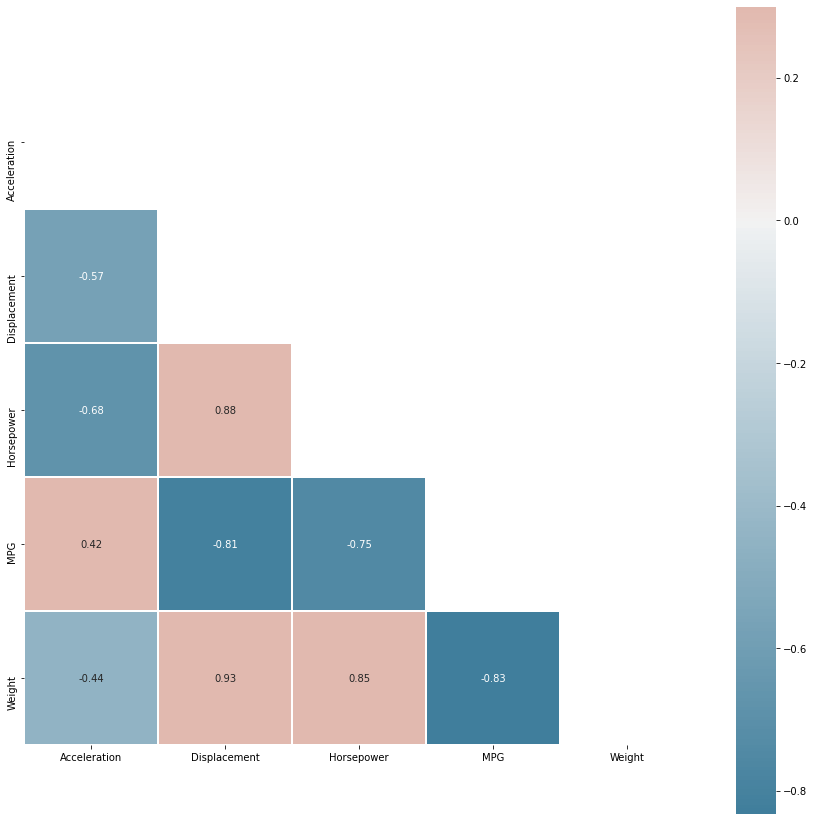

In [12]:
#Compute the correlation matrix
corr = carbigdfwtoutop.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heat = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .99}, annot=True, annot_kws={"size":10})


# Create a Rectangle patch
rect = patches.Rectangle((0.1,23),22.9,0.9,linewidth=3,edgecolor='r',facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)

Since Horsepower and Weight  are highly correlated with each other, they may exhibit same behaviour and hence those features can be dropped. 

Therefore, considering the features Displacement, Acceleration and MPG for further analysis.

##Pairplot

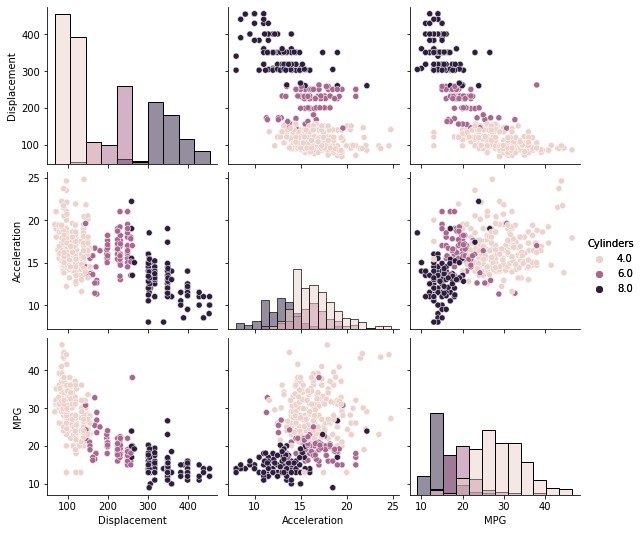

In [13]:
#Plotting pairplot
g = sns.pairplot(carbigdf[['Displacement','Acceleration', 'MPG', 'Cylinders']],
                 hue="Cylinders", kind='scatter', diag_kind='hist') 
g.map_offdiag(sns.scatterplot)
g.add_legend()

The pairplot seems to be doing just fine work. Other features again have been excluded in the analysis done above due to high correlation among each other.

Now, checking the 3D plots of the selected features for verification of the features selected.

##3D Plot

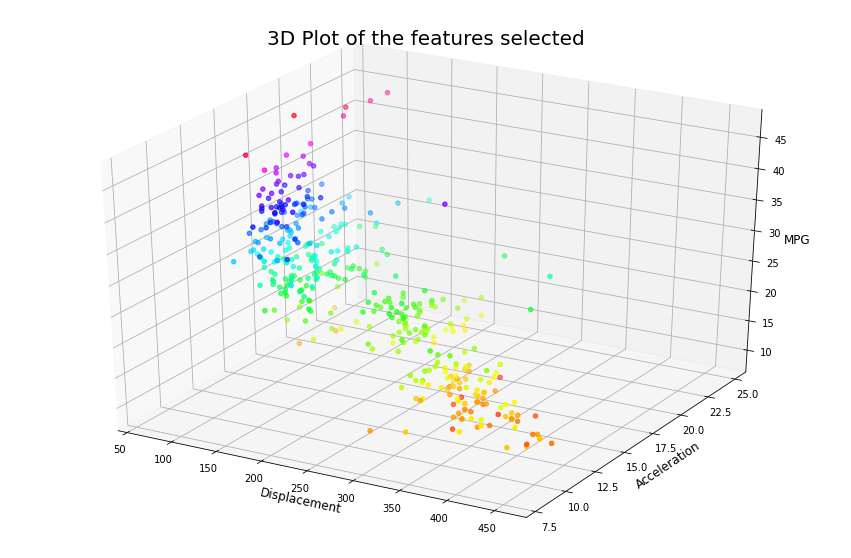

In [14]:
#Defining the axes for the 3D plot
x = carbigdf['Displacement']
y = carbigdf['Acceleration']
z = carbigdf['MPG']

#Plotting 3D plot
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection="3d")
ax.scatter3D(x, y, z, c=z, cmap='hsv');
ax.set_xlabel("Displacement", fontsize=12)
ax.set_ylabel("Acceleration", fontsize=12)
ax.set_zlabel("MPG", fontsize=12)
ax.set_title("3D Plot of the features selected", fontsize=20)

plt.show()

We can see that the data points can be differentiated distinctly and hence the selected features of Displacement, Acceleration and MPG are confirmed to be fit for further analysis.

#Model Implementation

For ensuring all of the classes are in the same proportion as they are in the dataset, **stratify=y** condition has been used. The train test split for the dataset was kept at 80:20 ratio.

##Classification

Splitting the data into dependent and independent variables

In [15]:
#Splitting the dataframe
X = carbigdf.drop(['Cylinders','Horsepower','Weight'], axis = 1)
y = carbigdf['Cylinders']

Since the values in the columns are not at all in the same range, hence scaling the data to enable us to compare it.

In [16]:
# Create the instance of the scaler
scaler = StandardScaler()
# Transform the inputs X
X_scaled = scaler.fit_transform(X)

Splitting the data into training and testing sets for the model implementations in rest of the analysis

In [17]:
# Split in train and test sets
X0_train, X0_test, y0_train, y0_test = train_test_split(X_scaled, y, train_size = 0.8, test_size=0.2 , random_state=0, stratify=y)

##Logistic Regression

First, defining the model

In [18]:
# define model
model = LogisticRegression(multi_class = 'ovr', random_state=0)

Next, fitting the model on the training data

In [19]:
# fit model
lr_model = model.fit(X0_train, y0_train)

Finally, using the fitted model for predicting class.

In [20]:
# make predictions
yhat = lr_model.predict(X0_test)

In [21]:
#Dislpaying the predicted output
yhat

array([8., 8., 8., 4., 4., 6., 8., 4., 8., 4., 4., 8., 4., 4., 6., 4., 4.,
       6., 4., 6., 8., 4., 4., 4., 4., 4., 8., 4., 6., 8., 4., 4., 4., 4.,
       4., 6., 8., 6., 4., 4., 8., 6., 4., 4., 4., 4., 4., 4., 4., 8., 6.,
       8., 8., 6., 8., 6., 8., 8., 8., 4., 8., 4., 4., 8., 4., 6., 4., 8.,
       8., 4., 4., 4., 4., 4., 8., 4., 4., 4., 4., 8.])

To better exhibit the results of the logistic regression, confusion matrix is calculated and shown below. 

In [22]:
#Calculating the confusion matrix
cm = confusion_matrix(y0_test, yhat)
print(cm)

[[41  0  0]
 [ 3 12  2]
 [ 0  0 22]]


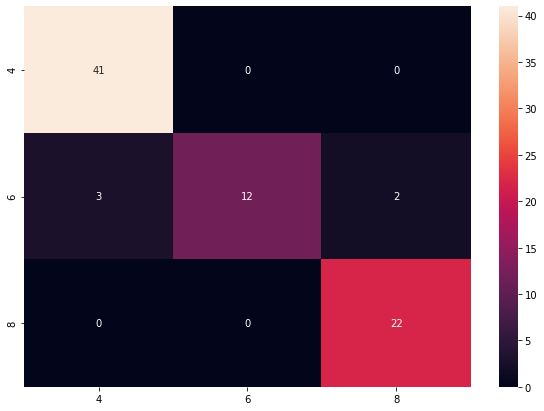

In [23]:
#Plotting the confusion matrix of the model
cm=confusion_matrix(y0_test,yhat)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, xticklabels=[4,6,8], yticklabels=[4,6,8])

The diagonal values shows the accurately classified values for each class. Out of total 80 values in the test dataset, 75 were predicted accurately in their respective classes. 5 values were misclassified , with 3 of them being misclassified as '4' instead of '6' and 2 of them being misclassified as '8' instead of '6'.

In [24]:
#Generating the classification report
print(classification_report(y0_test, yhat, target_names = ['4', '6','8']))

              precision    recall  f1-score   support

           4       0.93      1.00      0.96        41
           6       1.00      0.71      0.83        17
           8       0.92      1.00      0.96        22

    accuracy                           0.94        80
   macro avg       0.95      0.90      0.92        80
weighted avg       0.94      0.94      0.93        80



**Classification report** further expands on the confusion matrix and gives the parameters and further quantifies on how good the classification of the given model is. 

**Precision** in the classification report tells us the fraction of predictions of a positive class that were actually positive, i.e it gives us the accuracy of the positive predictions. It is fairly good for all the classes.

**Recall** gives the fraction of all positive samples that were correctly predicted as positive by the classifier, i.e fraction of positives correctly identified. It is god for classes 4 and 8. 

**F1- score** combines the precision and recall into a single measurement, it is the harmonic mean between precision and recall. It is the best for class 4 and class 8.

**Support** is the actual number of occurences of the class in the given dataset.

After the classification report, we find the accuracy of the applied model.

In [25]:
#Finding the accuracy
acc = accuracy_score(y0_test, yhat)
print("The accuracy score of the multiclass logistic regression is", acc*100, "%")

The accuracy score of the multiclass logistic regression is 93.75 %


**Misclassification Rate**

Source - https://www.ritchieng.com/machine-learning-evaluate-classification-model/


Misclassification rate can be found by subtracting the accuracy score from the highest value that it can attain, i.e 1

Misclassification rate = 1- accuracy_score value

In [26]:
#Finding the misclassification rate
misclass_logreg = 1-acc
print("The misclassification rate for the multiclass logistic regression is", misclass_logreg, "(", misclass_logreg*100, ")", "%")

The misclassification rate for the multiclass logistic regression is 0.0625 ( 6.25 ) %


**Final thoughts on Logistic Regression Implementation**

The parameter multi_class was set to 'ovr' as the given dataset has a multiclass classification and 'ovr'does justice to the problem at hand (reference- scikitlearn logistic regression documentation). The model gave an accuracy of 93.75% with a misclassification rate of 6.25%.

##Ordinal Logistic Regression (Extra) - Optional

In this, the multi-class labels of 4,6,8 cylinders have been divided into binary classes named 0 and 1. We will be implementing the binary logistic regression model 2 times, each time changing the y_train split of the dataframe, starting with assigning class 0 to label 4 and class 1 to the labels 6 and 8, and then consecutively assigning class 0 to labels 4,6 and class 1 to  label 8. Each time, we will be calculating the probability of class 0 and storing it in a variable. At the end, all variables containing probabilities will be stored in a list which will be compared with the y_test split of the dataset for yielding the accuracy of the model implemented. 

In [27]:
#Checking the shape of training and testing data
print(X0_train.shape)
print(X0_test.shape)
print(y0_train.shape)
print(y0_test.shape)

(319, 3)
(80, 3)
(319,)
(80,)


First, defining the model

In [28]:
#Defining the Logistic Regression model
model0 = LogisticRegression()

Taking the approach metioned above

In [29]:
#Classification 1 - label 4 - 0 ; Rest all - 1 
y_train_0 = y0_train.map({4:4, 6:6, 8:6})
model_0 = model0.fit(X0_train, y_train_0)
prob_0 = model_0.predict_proba(X0_test)
class_0_prob_1 = prob_0[:,0]
class_0_prob_1

array([5.70342018e-04, 2.67261047e-06, 3.05824925e-04, 9.96832512e-01,
       6.64128055e-01, 1.58398317e-02, 2.50385107e-05, 9.95930803e-01,
       4.01686449e-04, 9.81613453e-01, 8.01188140e-01, 3.89578232e-04,
       9.33329701e-01, 9.98904836e-01, 9.91222169e-03, 9.93145619e-01,
       8.87814543e-01, 6.35515280e-02, 9.93190414e-01, 1.72135019e-01,
       3.24852793e-05, 9.87562676e-01, 9.97728145e-01, 8.48296213e-01,
       9.91589922e-01, 9.94710537e-01, 4.09144746e-06, 9.99655154e-01,
       1.26315105e-02, 4.67386974e-04, 9.82254512e-01, 8.90839291e-01,
       8.98102747e-01, 9.93894954e-01, 9.92794672e-01, 7.26680708e-02,
       9.95676552e-05, 6.30017186e-02, 9.28064181e-01, 9.40313321e-01,
       2.34684335e-04, 1.65769520e-01, 4.60334491e-01, 9.52392505e-01,
       7.96297641e-01, 9.97955461e-01, 9.45105356e-01, 9.84821280e-01,
       9.85896388e-01, 5.93461507e-04, 4.46180138e-02, 4.46385945e-04,
       1.64599778e-07, 7.26732638e-02, 8.38899782e-04, 1.19513238e-02,
      

In [30]:
#Classification 2 - label 4,6 - 0 ; label 8- 1 
y_train_1 = y0_train.map({4:4, 6:4, 8:6})
model_1 = model0.fit(X0_train, y_train_1)
prob_1 = model_1.predict_proba(X0_test)
class_0_prob_2  = prob_1[: ,0] - prob_0[:,0]
class_0_prob_2

array([1.69585488e-01, 2.05625998e-03, 1.11471033e-01, 3.06310987e-03,
       3.30326342e-01, 8.09699304e-01, 1.41245757e-02, 3.97140357e-03,
       1.12012663e-01, 1.80174815e-02, 1.96284733e-01, 1.15402031e-01,
       6.55018886e-02, 1.06486745e-03, 7.33845270e-01, 6.67824991e-03,
       1.10204878e-01, 8.62886752e-01, 6.64188004e-03, 7.97989063e-01,
       1.78042705e-02, 1.22027624e-02, 2.22077179e-03, 1.50156470e-01,
       8.21870937e-03, 5.17395148e-03, 2.83536305e-03, 3.33728989e-04,
       7.44679337e-01, 1.57287519e-01, 1.72968909e-02, 1.07647014e-01,
       9.98721045e-02, 6.00970144e-03, 7.09954773e-03, 8.72557321e-01,
       3.12441339e-02, 8.70279225e-01, 7.06432928e-02, 5.88436151e-02,
       8.16359102e-02, 8.01475736e-01, 5.25840780e-01, 4.71717118e-02,
       2.00945735e-01, 2.00901117e-03, 5.41154283e-02, 1.49250705e-02,
       1.37767348e-02, 1.87102705e-01, 8.56293517e-01, 1.59728836e-01,
       1.67146016e-04, 8.67060488e-01, 1.91874280e-01, 7.62286756e-01,
      

In [31]:
#Classification 3
class_0_prob_3  = 1 -prob_1[: ,0]
class_0_prob_3 

array([8.29844170e-01, 9.97941067e-01, 8.88223142e-01, 1.04378235e-04,
       5.54560306e-03, 1.74460865e-01, 9.85850386e-01, 9.77929546e-05,
       8.87585650e-01, 3.69065478e-04, 2.52712671e-03, 8.84208391e-01,
       1.16841040e-03, 3.02969132e-05, 2.56242509e-01, 1.76130599e-04,
       1.98057922e-03, 7.35617200e-02, 1.67706094e-04, 2.98759173e-02,
       9.82163244e-01, 2.34561883e-04, 5.10832620e-05, 1.54731703e-03,
       1.91368643e-04, 1.15511184e-04, 9.97160546e-01, 1.11174829e-05,
       2.42689152e-01, 8.42245094e-01, 4.48597611e-04, 1.51369493e-03,
       2.02514898e-03, 9.53448238e-05, 1.05780653e-04, 5.47746080e-02,
       9.68656298e-01, 6.67190566e-02, 1.29252667e-03, 8.43064304e-04,
       9.18129405e-01, 3.27547433e-02, 1.38247283e-02, 4.35783685e-04,
       2.75662351e-03, 3.55280220e-05, 7.79215753e-04, 2.53649237e-04,
       3.26877347e-04, 8.12303833e-01, 9.90884692e-02, 8.39824778e-01,
       9.99832689e-01, 6.02662481e-02, 8.07286820e-01, 2.25761921e-01,
      

In [32]:
#Class 0 probabilities consolidated into one list
class_0_prob_all = []
class_0_prob_all = [class_0_prob_1, class_0_prob_2, class_0_prob_3]

In [33]:
#Converting the list into a dataframe
class_0_prob_all = pd.DataFrame(class_0_prob_all)

In [34]:
#Displaying the probabilities dataframe
class_0_prob_all

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79
0,0.000570,0.000003,0.000306,0.996833,0.664128,0.015840,0.000025,0.995931,0.000402,0.981613,0.801188,0.000390,0.933330,0.998905,0.009912,0.993146,0.887815,0.063552,0.993190,0.172135,0.000032,0.987563,0.997728,0.848296,0.991590,0.994711,0.000004,0.999655,0.012632,0.000467,0.982255,0.890839,0.898103,0.993895,0.992795,0.072668,0.000100,0.063002,0.928064,0.940313,0.000235,0.165770,0.460334,0.952393,0.796298,0.997955,0.945105,0.984821,0.985896,0.000593,0.044618,0.000446,1.645998e-07,0.072673,0.000839,0.011951,0.009190,0.011891,0.000003,0.999725,0.000324,0.942015,0.928126,0.000454,0.989592,0.067779,0.254892,0.000553,0.000115,0.986872,0.992865,0.995562,0.882821,0.995361,0.000040,0.989049,0.889855,0.999794,0.974638,0.009645
1,0.169585,0.002056,0.111471,0.003063,0.330326,0.809699,0.014125,0.003971,0.112013,0.018017,0.196285,0.115402,0.065502,0.001065,0.733845,0.006678,0.110205,0.862887,0.006642,0.797989,0.017804,0.012203,0.002221,0.150156,0.008219,0.005174,0.002835,0.000334,0.744679,0.157288,0.017297,0.107647,0.099872,0.006010,0.007100,0.872557,0.031244,0.870279,0.070643,0.058844,0.081636,0.801476,0.525841,0.047172,0.200946,0.002009,0.054115,0.014925,0.013777,0.187103,0.856294,0.159729,1.671460e-04,0.867060,0.191874,0.762287,0.671698,0.717824,0.002056,0.000266,0.107559,0.057341,0.070898,0.127738,0.010140,0.875407,0.723097,0.196708,0.053583,0.012787,0.006958,0.004360,0.115538,0.004515,0.021594,0.010717,0.108357,0.000199,0.024802,0.687412
2,0.829844,0.997941,0.888223,0.000104,0.005546,0.174461,0.985850,0.000098,0.887586,0.000369,0.002527,0.884208,0.001168,0.000030,0.256243,0.000176,0.001981,0.073562,0.000168,0.029876,0.982163,0.000235,0.000051,0.001547,0.000191,0.000116,0.997161,0.000011,0.242689,0.842245,0.000449,0.001514,0.002025,0.000095,0.000106,0.054775,0.968656,0.066719,0.001293,0.000843,0.918129,0.032755,0.013825,0.000436,0.002757,0.000036,0.000779,0.000254,0.000327,0.812304,0.099088,0.839825,9.998327e-01,0.060266,0.807287,0.225762,0.319112,0.270285,0.997941,0.000009,0.892117,0.000644,0.000976,0.871808,0.000268,0.056814,0.022011,0.802739,0.946302,0.000341,0.000177,0.000078,0.001641,0.000124,0.978366,0.000234,0.001788,0.000006,0.000560,0.302944


In [35]:
#Finding the highest probabilities in each column
all_labels_prob = class_0_prob_all.idxmax(axis=0)
all_labels_prob

0     2
1     2
2     2
3     0
4     0
     ..
75    0
76    0
77    0
78    0
79    1
Length: 80, dtype: int64

In [36]:
#Replacing the labels 0, 1 and 2 with the original labels to avoid misunderstanding in classification report and confusion matrix
all_labels_prob.replace({0:4, 1:6, 2:8}, inplace=True)

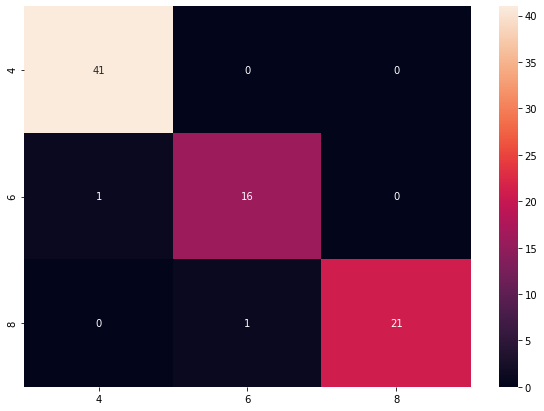

In [37]:
#Plotting the confusion matrix of the model
cm=confusion_matrix(y0_test,all_labels_prob)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, xticklabels=[4,6,8], yticklabels=[4,6,8])

The diagonal values shows the accurately classified values for each class. Out of total 80 values in the test dataset, 78 were predicted accurately in their respective classes. 2 values were misclassified , with 1 being misclassified as class '4' instead of class '6' and 1 misclassified as class '6' instead of class '8'.

In [38]:
#Classification report of the confusion matrix represented above
cr = classification_report(y0_test,all_labels_prob)
print("\nClassification report:\n", cr)


Classification report:
               precision    recall  f1-score   support

         4.0       0.98      1.00      0.99        41
         6.0       0.94      0.94      0.94        17
         8.0       1.00      0.95      0.98        22

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80



**Classification report** further expands on the confusion matrix and gives the parameters and further quantifies on how good the classification of the given model is. 

**Precision** in the classification report tells us the fraction of predictions of a positive class that were actually positive, i.e it gives us the accuracy of the positive predictions. It is good value for all the classes.

**Recall** gives the fraction of all positive samples that were correctly predicted as positive by the classifier, i.e fraction of positives correctly identified. It is also good for all classes in this case

**F1- score** combines the precision and recall into a single measurement, it is the harmonic mean between precision and recall. It is good for all the classes.

**Support** is the actual number of occurences of the class in the given dataset.

After the classification report, we find the accuracy of the applied model.

In [39]:
#Accuracy of the model
score =accuracy_score(y0_test,all_labels_prob)
print("The Accuracy of the model is", score*100, "%")

The Accuracy of the model is 97.5 %


**Misclassification Rate**

Source - https://www.ritchieng.com/machine-learning-evaluate-classification-model/


Misclassification rate can be found by subtracting the accuracy score from the highest value that it can attain, i.e 1

Misclassifictaion rate = 1- accuracy_score value

In [40]:
#Finding the misclassification rate
misclass_logrego = 1-score
print("The misclassification rate for the ordinal logistic regression is", misclass_logrego, "(", misclass_logrego*100, ")", "%")

The misclassification rate for the ordinal logistic regression is 0.025000000000000022 ( 2.500000000000002 ) %


**Final thoughts on Ordinary Logistic Regression approach**

When this approach is compared to the simple logistic regression approach done above, it yields more accuracy as the classes have been nested together and then analysed. OneVsRest argument has been properly incorporated in this method. Hence, this approach can definitely be considered while dealing with multiclass classification problems.

##Support Vector Classifier

First, defining the model

In [41]:
#Defining model
svclassifier = SVC(C= 100, gamma = 0.01, kernel = 'rbf')

Next, fitting the model on the training data

In [42]:
#Fitting model
svc_model = svclassifier.fit(X0_train, y0_train)

Finally, using the fitted model for predicting class.

In [43]:
#Making predictions
y_predi = svc_model.predict(X0_test)
y_predi

array([8., 8., 8., 4., 4., 6., 8., 4., 8., 4., 4., 8., 4., 4., 6., 4., 4.,
       6., 4., 6., 8., 4., 4., 4., 4., 4., 8., 4., 6., 8., 4., 4., 4., 4.,
       4., 6., 8., 6., 4., 4., 8., 6., 6., 4., 4., 4., 4., 4., 4., 8., 6.,
       8., 8., 6., 8., 6., 6., 6., 8., 4., 8., 4., 4., 8., 4., 6., 6., 8.,
       8., 4., 4., 4., 4., 4., 8., 4., 4., 4., 4., 6.])

To better exhibit the results, confusion matrix is calculated and shown below. 

In [44]:
#Calculating the confusion matrix
print(confusion_matrix(y0_test,y_predi))

[[41  0  0]
 [ 1 16  0]
 [ 0  1 21]]


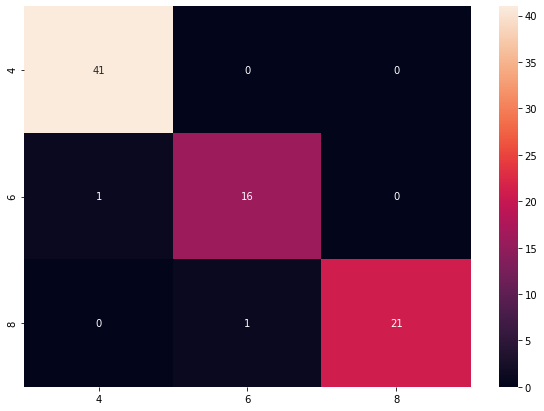

In [45]:
#Plotting the confusion matrix of the model
cm=confusion_matrix(y0_test,y_predi)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, xticklabels=[4,6,8], yticklabels=[4,6,8])

The diagonal values shows the accurately classified values for each class. Out of total 80 values in the test dataset, 78 were predicted accurately in their respective classes. 2 values were misclassified , with 1 being misclassified as class '4' instead of class '6' and 1 misclassified as class '6' instead of class '8'.

In [46]:
#Classification report
print(classification_report(y0_test,y_predi))

              precision    recall  f1-score   support

         4.0       0.98      1.00      0.99        41
         6.0       0.94      0.94      0.94        17
         8.0       1.00      0.95      0.98        22

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80



**Classification report** further expands on the confusion matrix and gives the parameters and further quantifies on how good the classification of the given model is. 

**Precision** in the classification report tells us the fraction of predictions of a positive class that were actually positive, i.e it gives us the accuracy of the positive predictions. It is good value for all the classes.

**Recall** gives the fraction of all positive samples that were correctly predicted as positive by the classifier, i.e fraction of positives correctly identified. It is also good for all classes in this case

**F1- score** combines the precision and recall into a single measurement, it is the harmonic mean between precision and recall. It is good for all the classes.

**Support** is the actual number of occurences of the class in the given dataset.

After the classification report, we find the accuracy of the applied model.

In [47]:
#Accuracy of the model
svc_score =accuracy_score(y0_test,y_predi)
print("The Accuracy of the model is", svc_score*100, "%")

The Accuracy of the model is 97.5 %


**Misclassification Rate**

Source - https://www.ritchieng.com/machine-learning-evaluate-classification-model/


Misclassification rate can be found by subtracting the accuracy score from the highest value that it can attain, i.e 1

Misclassification rate = 1- accuracy_score value

In [48]:
#Finding the misclassification rate
misclass_svc = 1-svc_score
print("The misclassification rate for the Support Vector Classifier is", misclass_svc, "(",misclass_svc*100, ")", "%")

The misclassification rate for the Support Vector Classifier is 0.025000000000000022 ( 2.500000000000002 ) %


Hyperparameter tuning for finding optimal parameters

In [49]:
#Hyperparameter tuning
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X0_train, y0_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.875, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.984, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.875, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.938, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.952, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.844, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.891, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.922, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.952, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.719, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.734, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.766, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.703, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [50]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


**Final Thoughts on Support Vector Classifier**

The parameters for the Support Vector Classifier were found by applying the hyperparameter tuning GridSearchCV (5-fold cross validation). The optimal parameters of C, gamma and kernel were obtained as 100, 0.01 and rbf respectively. Hence using these values, the results obtained from Support Vector Classifier are similar to those obtained from Ordinal Logistic Regression approach. Both the methods generate an accuracy of 97.5%, and a misclassification rate of 2.5%. Hence both can be said to be performing equally well.

##Decision Tree Classifier

First, defining the model

In [51]:
#Defining model
estimator = DecisionTreeClassifier(criterion = 'gini', random_state=0)

Next, fitting the model on the training data

In [52]:
#Fitting model
model_dt  = estimator.fit(X0_train, y0_train)

Finally, using the fitted model for predicting class.

In [53]:
#Making Predictions
y_dt = model_dt.predict(X0_test)
y_dt

array([8., 8., 8., 4., 6., 6., 8., 4., 8., 4., 4., 8., 4., 4., 6., 4., 4.,
       6., 4., 6., 8., 4., 4., 4., 4., 4., 8., 4., 6., 8., 4., 4., 6., 4.,
       4., 6., 8., 6., 4., 4., 8., 6., 6., 4., 4., 4., 4., 4., 4., 8., 6.,
       8., 8., 6., 8., 6., 6., 6., 8., 4., 8., 4., 4., 8., 4., 6., 6., 8.,
       8., 4., 4., 4., 4., 4., 8., 4., 4., 4., 4., 8.])

To better exhibit the results, confusion matrix is calculated and shown below. 

In [54]:
#Calculating the confusion matrix
cm = confusion_matrix(y0_test, y_dt)
print(cm)

[[40  1  0]
 [ 0 17  0]
 [ 0  0 22]]


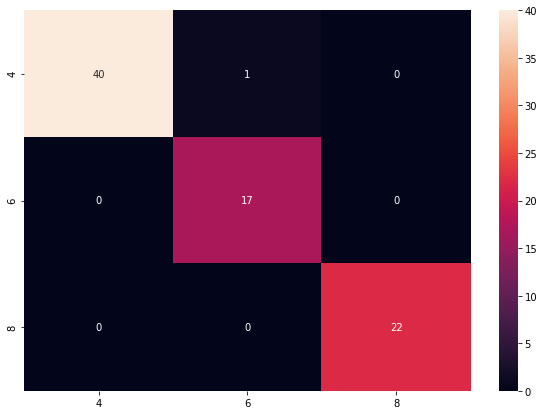

In [55]:
#Plotting the confusion matrix of the model
cm=confusion_matrix(y0_test,y_dt)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, xticklabels=[4,6,8], yticklabels=[4,6,8])

The diagonal values shows the accurately classified values for each class. Out of total 80 values in the test dataset, 79 were predicted accurately in their respective classes. 1 value was misclassified as class '6' instead of class '4'.

In [56]:
#Classification report
print(classification_report(y0_test, y_dt, target_names = ['4', '6', '8']))

              precision    recall  f1-score   support

           4       1.00      0.98      0.99        41
           6       0.94      1.00      0.97        17
           8       1.00      1.00      1.00        22

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



**Classification report** further expands on the confusion matrix and gives the parameters and further quantifies on how good the classification of the given model is. 

**Precision** in the classification report tells us the fraction of predictions of a positive class that were actually positive, i.e it gives us the accuracy of the positive predictions. It is good value for all the classes.

**Recall** gives the fraction of all positive samples that were correctly predicted as positive by the classifier, i.e fraction of positives correctly identified. It is also good for all classes in this case

**F1- score** combines the precision and recall into a single measurement, it is the harmonic mean between precision and recall. It is good for all the classes.

**Support** is the actual number of occurences of the class in the given dataset.

Plotting the decision tree classifier below

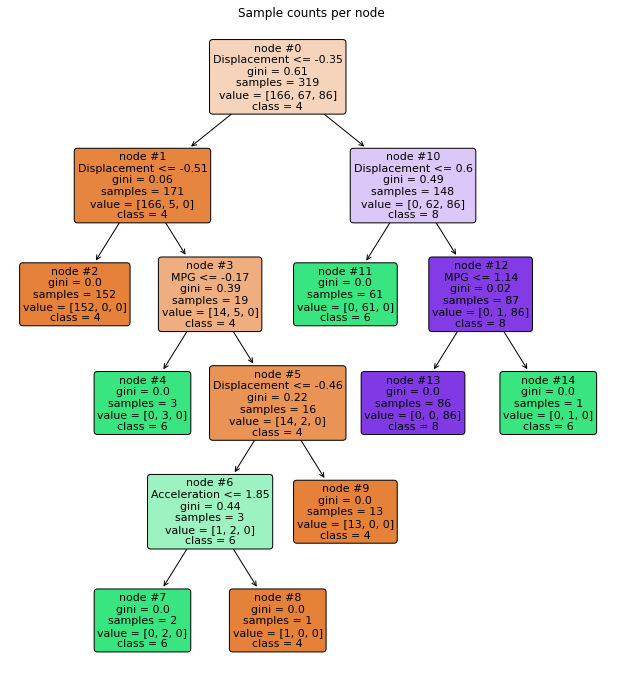

In [57]:
#Plotting the decision tree classifier
fig_1 = plt.figure(figsize=(24,12))

fig_1_a = plt.subplot(121)
axs1 = plot_tree(estimator, filled=True, feature_names = list(X.columns), class_names = ['4', '6','8'], rounded = True, precision = 2, node_ids=True)
fig_1_a.set_title('Sample counts per node')

plt.show()

After this, we find the accuracy of the applied model.

In [58]:
#Accuracy of the model
dtc_score =accuracy_score(y0_test,y_dt)
print("The Accuracy of the model is", dtc_score*100, "%")

The Accuracy of the model is 98.75 %


**Misclassification Rate**

Source - https://www.ritchieng.com/machine-learning-evaluate-classification-model/


Misclassification rate can be found by subtracting the accuracy score from the highest value that it can attain, i.e 1

Misclassificaion rate = 1- accuracy_score value

In [59]:
#Finding the misclassification rate
misclass_dtc = 1-dtc_score
print("The misclassification rate for the Decision Tree Classifier is", misclass_dtc, "(",misclass_dtc*100, ")", "%")

The misclassification rate for the Decision Tree Classifier is 0.012499999999999956 ( 1.2499999999999956 ) %


Now for justification for selection of max_depth =2 , the hyperparamter tuning for the parameter was done as shown below. 

In [60]:
#Tuning for max depth parameter
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))
# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X0_train, y0_train)
    score = clf.score(X0_test, y0_test)
    accuracy.append(score)

Text(0.5, 1.0, 'Hyperparameter Tuning for max_depth parameter')

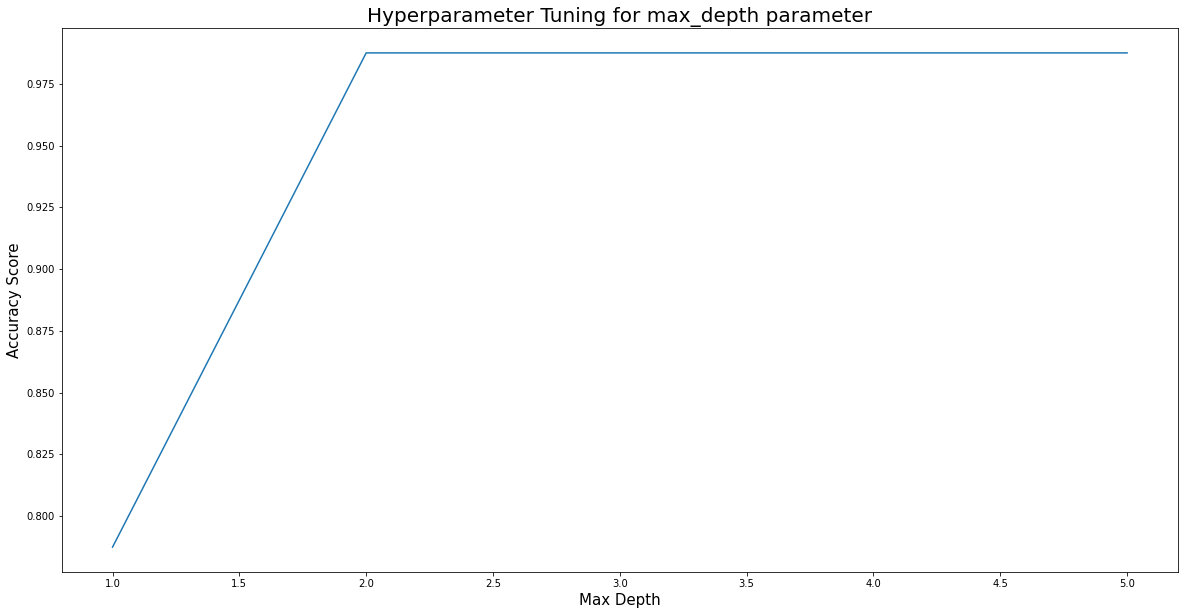

In [61]:
#Plotting the hyperparameter tuning analysis done above
plt.figure(figsize=(20,10))
plt.plot(max_depth_range, accuracy)
plt.xlabel("Max Depth", fontsize=15)
plt.ylabel("Accuracy Score", fontsize=15)
plt.title("Hyperparameter Tuning for max_depth parameter", fontsize=20)

Thus, from hyperparameter tuning, we can clearly infer that max_depth=2 gives the highest accuracy for decision tree classifer model, hence the value is used in the analysis.

**Final Thoughts on Decision Tree Classifier**

The parameter for max_depth was subjected to tuning as shown in the analysis above and an optimal values were found to be greater than and equal to 2. Also, the criterion of gini index and entropy gives the same result hence was not tuned. Decision Tree Classifier gives the best results of accuracy 98.75% and misclassification rate of 1.25%, among all of the models applied for the classification. Hence classification can be best applied on this dataset by Decision Tree Classifier.

Comparison for all models implemented in the classification is given below. From the overall analysis done for the classification, it can be concluded that Decision Tree Classifier performs the best on the given dataset.

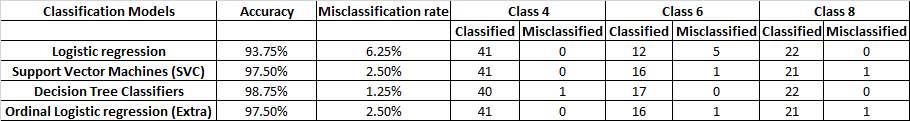

#Regression

##Least Squares and LASSO Regularization

###LASSO Regularization


First, defining the model

In [62]:
#Defining the model
lassoreg = Lasso(alpha=0.02)

Next, fitting the model on the training data

In [63]:
#Fitting the model
lassoreg_model = lassoreg.fit(X0_train, y0_train)

Finally, using the fitted model for predicting class.

In [64]:
#Making predictions
y_lsq = lassoreg_model.predict(X0_test)
y_lsq

array([7.09061418, 8.55376755, 7.32621359, 3.83619561, 4.75330595,
       6.32491611, 7.82422174, 3.86970729, 7.15083432, 4.19233619,
       4.81486656, 7.30342565, 4.52432817, 3.75454817, 6.33161844,
       3.99217846, 4.36507487, 5.92596129, 3.87640963, 5.53240869,
       7.81751941, 3.99156875, 3.70641241, 4.67836084, 4.11332933,
       3.88311196, 8.53701172, 3.78728874, 6.31151144, 7.10401885,
       4.27662421, 4.39990684, 4.65683266, 3.91662364, 4.00497342,
       5.93936596, 7.11072119, 5.93668503, 4.28474772, 4.34232728,
       7.11072119, 5.55515628, 5.11870873, 4.39056392, 4.53111121,
       3.80816686, 4.19375736, 4.01969838, 3.88179167, 7.09731652,
       5.93668503, 7.11072119, 9.35693818, 5.92998269, 7.06246437,
       6.43266231, 6.31151144, 6.3048091 , 8.55376755, 3.77924594,
       7.31616008, 4.37715925, 4.36375457, 7.12473557, 4.06580327,
       6.02369434, 5.14823936, 7.11072119, 7.35972527, 4.25519691,
       3.96943087, 3.99355927, 4.38786281, 3.86233472, 7.82554

Now, the predicted results from the LASSO regularization will not make sense because of the predictions other than the given classes of 4,6 and 8 cylinders. So, to scale or convert it to the required classes, again, the code is written below.

In [65]:
#Code for converting the predicted output to nearest 4,6,8 class
num = []
for i in y_lsq:
  if i<=5:
    i = 4
  elif 5<=i<=7:
    i = 6
  elif i>=7:
    i = 8 
  num.append(i)
num= np.asarray(num)
num

array([8, 8, 8, 4, 4, 6, 8, 4, 8, 4, 4, 8, 4, 4, 6, 4, 4, 6, 4, 6, 8, 4,
       4, 4, 4, 4, 8, 4, 6, 8, 4, 4, 4, 4, 4, 6, 8, 6, 4, 4, 8, 6, 6, 4,
       4, 4, 4, 4, 4, 8, 6, 8, 8, 6, 8, 6, 6, 6, 8, 4, 8, 4, 4, 8, 4, 6,
       6, 8, 8, 4, 4, 4, 4, 4, 8, 4, 4, 4, 4, 6])

Next, for finding accuracy of the model implemented, we compare the predicted output 

In [66]:
#Comparing the predicted output to the test split of the dataset
y_comp_lasso = (y0_test == num)

The accuracy score in this case can be found out by dividing the number of values similar in both test split and predicted output by the length of the test split. The calculations mentioned are shown below.

In [67]:
#Calculating accuracy
acc_lasso = (sum(y_comp_lasso)/len(y0_test))
print("Accuracy of the model is", acc_lasso*100, "%")

Accuracy of the model is 97.5 %


Finding the R2 score, Mean squared error and root mean squared error for this model implementation.

In [68]:
#Squares calculation
print("R-Square Value",r2_score(y0_test,num))
print("\n")
print ("mean_squared_error : ",mean_squared_error(y0_test,num))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(mean_squared_error(y0_test,num)))

R-Square Value 0.9658046591151955


mean_squared_error :  0.1


root_mean_squared_error :  0.31622776601683794


For the selection of value for alpha, following hyperparameter tuning was done. RepeatedKFold and GridSearchCV was used in the tuning.

In [69]:
#Source - https://machinelearningmastery.com/lasso-regression-with-python/ 
# grid search hyperparameters for lasso regression
# define model
model_lasso = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model_lasso, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X0_train, y0_train)
# summarize
print('Config: %s' % results.best_params_)

Config: {'alpha': 0.02}


**Final thoughts on LASSO regularization**

The value for parameter alpha was found to be 0.02 by hyperparameter tuning and the model was implemented on this value. The accuracy obtained was 97.5% with a R-square value of 0.97, and root mean square value of 0.32. The predicted was rounded off to nearest 4,6 or 8 class integer and the accuracy was found by comparing the predicted output to the test split and dividing it by the length of the test split.

###Least Squares

First, defining the model

In [70]:
#Defining the model
leastsq = Lasso(alpha=0)

Next, fitting the model on the training data

In [71]:
#Fitting the model
leastsq_model = leastsq.fit(X0_train, y0_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discouraged.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.93355600739908, tolerance: 0.09277492163009403



Finally, using the fitted model for predicting class.

In [72]:
#Making predictions
y_lsq1 = leastsq_model.predict(X0_test)
y_lsq1

array([7.11223707, 8.58725483, 7.35325414, 3.79541197, 4.74105169,
       6.35948248, 7.85237719, 3.84744869, 7.16077344, 4.17055111,
       4.81662898, 7.31952515, 4.50464466, 3.7359257 , 6.36001378,
       3.96161758, 4.33933196, 5.94045259, 3.84698242, 5.54225393,
       7.84685799, 3.97496547, 3.6925633 , 4.69257132, 4.0903724 ,
       3.86447258, 8.56821953, 3.77205853, 6.33098642, 7.13075733,
       4.24126748, 4.39074886, 4.62811203, 3.91900325, 4.01094337,
       5.96695349, 7.10634914, 5.95876033, 4.25927429, 4.33498737,
       7.12630073, 5.56156222, 5.09711568, 4.41440153, 4.52454036,
       3.81399705, 4.18453509, 4.009391  , 3.84863234, 7.12473933,
       5.9502809 , 7.14126443, 9.3891891 , 5.95074717, 7.07259635,
       6.46323278, 6.32350458, 6.31798537, 8.58725483, 3.76344032,
       7.33724409, 4.38640427, 4.35790822, 7.13745858, 4.03166695,
       6.05408571, 5.14579668, 7.14625233, 7.38833201, 4.22084058,
       3.94031413, 3.9931034 , 4.37755006, 3.83165117, 7.85624

Now, the predicted results from the Least squares implementation will not make sense because of the predictions other than the given classes of 4,6 and 8 cylinders. So, to scale or convert it to the required classes, again, the code is written below.

In [73]:
#Code for converting the predicted output to nearest 4,6,8 class
num1 = []
for i1 in y_lsq1:
  if i1<=5:
    i1 = 4
  elif 5<=i1<=7:
    i1 = 6
  elif i1>=7:
    i1 = 8 
  num1.append(i1)
num1= np.asarray(num1)
num1

array([8, 8, 8, 4, 4, 6, 8, 4, 8, 4, 4, 8, 4, 4, 6, 4, 4, 6, 4, 6, 8, 4,
       4, 4, 4, 4, 8, 4, 6, 8, 4, 4, 4, 4, 4, 6, 8, 6, 4, 4, 8, 6, 6, 4,
       4, 4, 4, 4, 4, 8, 6, 8, 8, 6, 8, 6, 6, 6, 8, 4, 8, 4, 4, 8, 4, 6,
       6, 8, 8, 4, 4, 4, 4, 4, 8, 4, 4, 4, 4, 6])

Next, for finding accuracy of the model implemented, we compare the predicted output 

In [74]:
#Comparing the predicted output to the test split of the dataset
y_comp_lsq = (y0_test == num1)

The accuracy score in this case can be found out by dividing the number of values similar in both test split and predicted output by the length of the test split. The calculations mentioned are shown below.

In [75]:
#Calculating accuracy
acc_lsq = (sum(y_comp_lsq)/len(y0_test))
print("Accuracy of the model is", acc_lsq*100, "%")

Accuracy of the model is 97.5 %


In [76]:
#Squares calculation
print("R-Square Value",r2_score(y0_test,num1))
print("\n")
print ("mean_squared_error : ",mean_squared_error(y0_test,num1))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(mean_squared_error(y0_test,num1)))

R-Square Value 0.9658046591151955


mean_squared_error :  0.1


root_mean_squared_error :  0.31622776601683794


**Final thoughts on Least Squares Implementation**

The value for parameter alpha was put to be 0 and the model was implemented on this value. The accuracy obtained was 97.5% with a R-square value of 0.97, and root mean square value of 0.32. The predicted was rounded off to nearest 4,6 or 8 integer and the accuracy was found by comparing the predicted output to the test split and dividing it by the length of the test split. No change was observed in LASSO and least squares implementation.

##Support Vector Regression

First, defining the model

In [77]:
#Defining model
regressor = SVR(C=10, epsilon=0.3, gamma= 1e-07, kernel= 'linear')

Next, fitting the model on the training data

In [78]:
#Fitting model
model_svr = regressor.fit(X0_train,y0_train)

Finally, using the fitted model for predicting class.

In [79]:
#Making predictions
y_svr = model_svr.predict(X0_test)
y_svr

array([7.0114522 , 8.45951179, 7.25233678, 3.76751786, 4.67445406,
       6.28414128, 7.73164675, 3.82023461, 7.05478995, 4.13193425,
       4.7652951 , 7.21950118, 4.45799035, 3.72499136, 6.27672273,
       3.92938269, 4.27752063, 5.86914102, 3.81100173, 5.47310872,
       7.72999363, 3.93618149, 3.66986562, 4.64355951, 4.06063037,
       3.83442685, 8.44585375, 3.78014823, 6.24908421, 7.02836594,
       4.20374203, 4.33353844, 4.57757796, 3.89167944, 3.98484605,
       5.90056942, 6.97558907, 5.88902218, 4.20200853, 4.28591682,
       7.01187573, 5.49192753, 5.02907094, 4.37608453, 4.46136922,
       3.79990363, 4.13126912, 3.96968135, 3.8011893 , 7.02580566,
       5.87360034, 7.03909072, 9.24762832, 5.88283322, 6.97457261,
       6.38668206, 6.23547671, 6.23382359, 8.45951179, 3.77453582,
       7.23579602, 4.34193463, 4.30687756, 7.03287667, 3.99507718,
       5.99002266, 5.06850478, 7.04816239, 7.27420988, 4.18731711,
       3.90693522, 3.97275943, 4.31852073, 3.80072644, 7.74311

Now, the predicted results from the Support Vector Regressor will not make sense because of the predictions other than the given classes of 4,6 and 8 cylinders. So, to scale or convert it to the required classes, again, the code is written below.

In [80]:
#Code for converting the predicted output to nearest 4,6,8 class
num2 = []
for i2 in y_svr:
  if i2<=5:
    i2 = 4
  elif 5<=i2<=7:
    i2 = 6
  elif i2>=7:
    i2 = 8 
  num2.append(i2)
num2= np.asarray(num2)
num2

array([8, 8, 8, 4, 4, 6, 8, 4, 8, 4, 4, 8, 4, 4, 6, 4, 4, 6, 4, 6, 8, 4,
       4, 4, 4, 4, 8, 4, 6, 8, 4, 4, 4, 4, 4, 6, 6, 6, 4, 4, 8, 6, 6, 4,
       4, 4, 4, 4, 4, 8, 6, 8, 8, 6, 6, 6, 6, 6, 8, 4, 8, 4, 4, 8, 4, 6,
       6, 8, 8, 4, 4, 4, 4, 4, 8, 4, 4, 4, 4, 6])

Next, for finding accuracy of the model implemented, we compare the predicted output 

In [81]:
#Comparing the predicted output to the test split of the dataset
y_comp_svr = (y0_test ==num2)

The accuracy score in this case can be found out by dividing the number of values similar in both test split and predicted output by the length of the test split. The calculations mentioned are shown below.

In [82]:
#Calculating accuracy
acc_svr = (sum(y_comp_svr)/len(y0_test))
print("Accuracy of the model is", acc_svr*100, "%")

Accuracy of the model is 95.0 %


Finding the R2 score, Mean squared error and root mean squared error for this model implementation.

In [83]:
#Squares calculation
print("R-Square Value",r2_score(y0_test,num2))
print("\n")
print ("mean_squared_error : ",mean_squared_error(y0_test,num2))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(mean_squared_error(y0_test,num2)))

R-Square Value 0.9316093182303911


mean_squared_error :  0.2


root_mean_squared_error :  0.4472135954999579


The arguments for the SVR model were selected based on the following hyperparameter tuning

In [84]:
#Hyperparameter Tuning 
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
svr = SVR()
clf_ = GridSearchCV(svr, parameters)
clf_.fit(X0_train,y0_train)
clf_.best_params_

{'C': 10, 'epsilon': 0.3, 'gamma': 1e-07, 'kernel': 'linear'}

**Final thoughts on Support Vector Regression**

The value for parameters C, epsilon, gamma and kernel were found to be 10, 0.3, 10^-7 and linear respectively by hyperparameter tuning and the model was implemented on these values. The accuracy obtained was 95% with a R-square value of 0.93, and root mean square value of 0.45.The predicted was rounded off to nearest 4,6 or 8 integer and the accuracy was found by comparing the predicted output to the test split and dividing it by the length of the test split. This model seems to be performing better than the previously implemented LASSO and Least squares models.

##Decision Tree Regressor

First, defining the model

In [85]:
#Defining model
dtr_regressor = DecisionTreeRegressor(max_depth=4,random_state=0) 

Next, fitting the model on the training data

In [86]:
#Fitting model
model_dtr = dtr_regressor.fit(X0_train, y0_train) 

Finally, using the fitted model for predicting class.

In [87]:
#Making predicitons
y_dtr = model_dtr.predict(X0_test) 
y_dtr

array([8.        , 8.        , 8.        , 4.        , 5.33333333,
       6.        , 8.        , 4.        , 8.        , 4.        ,
       4.        , 8.        , 4.        , 4.        , 6.        ,
       4.        , 4.        , 6.        , 4.        , 6.        ,
       8.        , 4.        , 4.        , 4.        , 4.        ,
       4.        , 8.        , 4.        , 6.        , 8.        ,
       4.        , 4.        , 5.33333333, 4.        , 4.        ,
       6.        , 8.        , 6.        , 4.        , 4.        ,
       8.        , 6.        , 6.        , 4.        , 4.        ,
       4.        , 4.        , 4.        , 4.        , 8.        ,
       6.        , 8.        , 8.        , 6.        , 8.        ,
       6.        , 6.        , 6.        , 8.        , 4.        ,
       8.        , 4.        , 4.        , 8.        , 4.        ,
       6.        , 6.        , 8.        , 8.        , 4.        ,
       4.        , 4.        , 4.        , 4.        , 8.     

Now, the predicted results from the Decision Tree Regressor will not make sense because of the predictions other than the given classes of 4,6 and 8 cylinders. So, to scale or convert it to the required classes, again, the code is written below.

In [88]:
#Code for converting the predicted output to nearest 4,6,8 class
num3 = []
for i3 in y_dtr:
  if i3<=5:
    i3 = 4
  elif 5<=i3<=7:
    i3 = 6
  elif i3>=7:
    i3 = 8 
  num3.append(i3)
num3= np.asarray(num3)
num3

array([8, 8, 8, 4, 6, 6, 8, 4, 8, 4, 4, 8, 4, 4, 6, 4, 4, 6, 4, 6, 8, 4,
       4, 4, 4, 4, 8, 4, 6, 8, 4, 4, 6, 4, 4, 6, 8, 6, 4, 4, 8, 6, 6, 4,
       4, 4, 4, 4, 4, 8, 6, 8, 8, 6, 8, 6, 6, 6, 8, 4, 8, 4, 4, 8, 4, 6,
       6, 8, 8, 4, 4, 4, 4, 4, 8, 4, 4, 4, 4, 8])

Next, for finding accuracy of the model implemented, we compare the predicted output 

In [89]:
#Comparing the predicted output to the test split of the dataset
y_comp_dtr = (y0_test == num3)

The accuracy score in this case can be found out by dividing the number of values similar in both test split and predicted output by the length of the test split. The calculations mentioned are shown below.

In [90]:
#Calculating accuracy
acc_dtr = (sum(y_comp_dtr)/len(y0_test))
print("Accuracy of the model is", acc_dtr*100, "%")

Accuracy of the model is 98.75 %


Finding the R2 score, Mean squared error and root mean squared error for this model implementation.

In [91]:
#Squares calculation
print("R-Square Value",r2_score(y0_test,num3))
print("\n")
print ("mean_squared_error : ",mean_squared_error(y0_test,num3))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(mean_squared_error(y0_test,num3)))

R-Square Value 0.9829023295575978


mean_squared_error :  0.05


root_mean_squared_error :  0.22360679774997896


Plotting the decision tree below

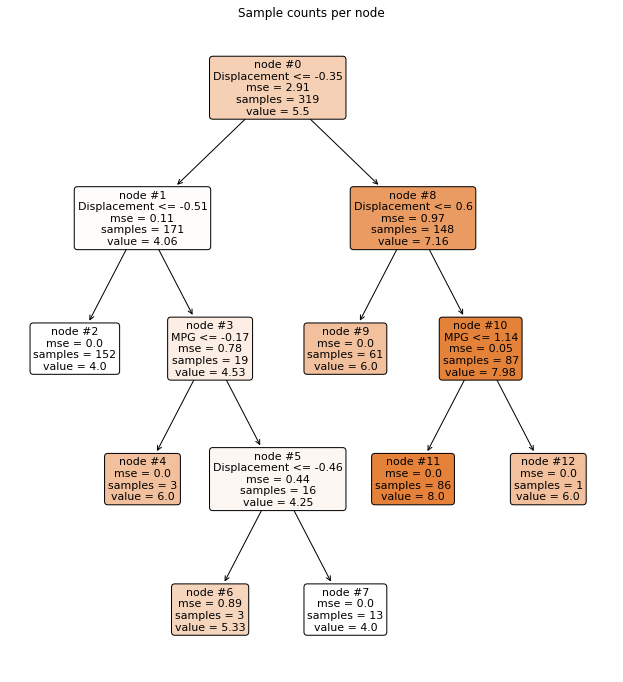

In [92]:
#Plotting the decision tree classifier
fig_2 = plt.figure(figsize=(24,12))

fig_2_a = plt.subplot(121)
axs2 = plot_tree(dtr_regressor, filled=True, feature_names = list(X.columns), class_names = ['4', '6','8'], rounded = True, precision = 2, node_ids=True)
fig_2_a.set_title('Sample counts per node')

plt.show()

Now for justification for selection of max_depth =4 , the hyperparamter tuning for the parameter was done as shown below. 

In [93]:
#Tuning for max depth parameter
# List of values to try for max_depth:
max_depth_range1 = list(range(1, 6))
# List to store the average RMSE for each value of max_depth:
accuracy1 = []
for depth in max_depth_range1:
    
    clf1 = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 0)
    clf1.fit(X0_train, y0_train)
    score1 = clf1.score(X0_test, y0_test)
    accuracy1.append(score1)

Text(0.5, 1.0, 'Hyperparameter Tuning for max_depth parameter')

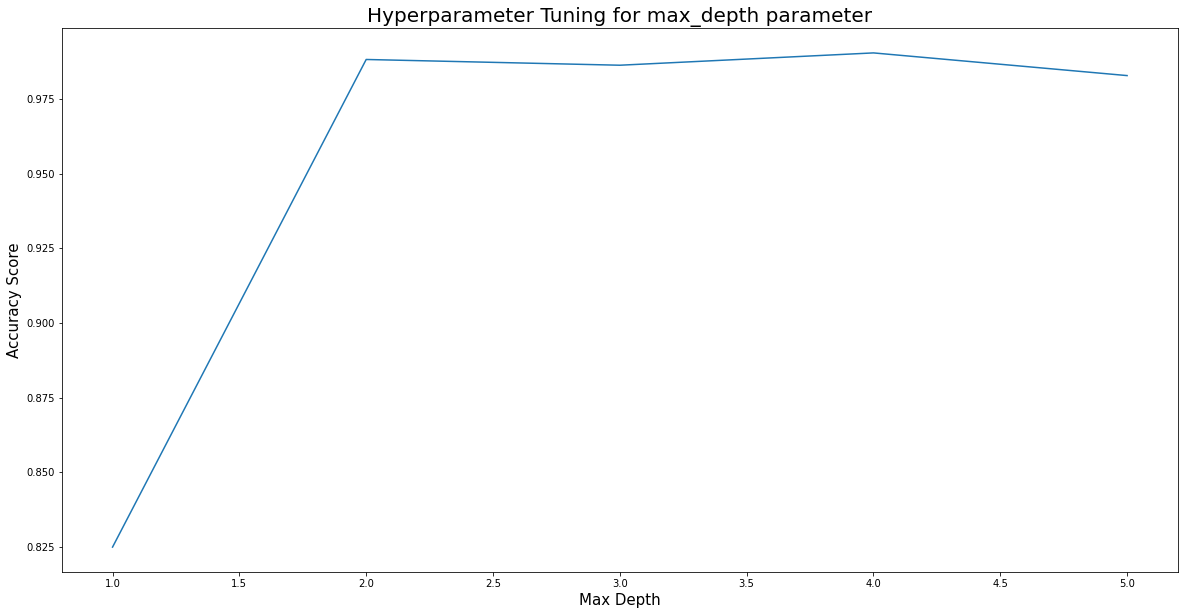

In [94]:
#Plotting the hyperparameter tuning analysis done above
plt.figure(figsize=(20,10))
plt.plot(max_depth_range1, accuracy1)
plt.xlabel("Max Depth", fontsize=15)
plt.ylabel("Accuracy Score", fontsize=15)
plt.title("Hyperparameter Tuning for max_depth parameter", fontsize=20)

**Final Thoughts on Decision Tree Regressor**

The parameter for max_depth was subjected to tuning as shown in the analysis above and an optimal values was found to be 4. Also, the criterion of gini index and entropy gives the same result hence was not tuned. The accuracy obtained was 98.75% with a R-square value of 0.98, and root mean square value of 0.22.The predicted was rounded off to nearest 4,6 or 8 integer and the accuracy was found by comparing the predicted output to the test split and dividing it by the length of the test split

Decision Tree regressor gives the best results among all of the models applied for the regression too. Hence regression can be best applied on this dataset by Decision Tree Regressor.

Comparison of all models implemented in the regression is given below. From the analysis, Decision Tree Regressor, again is found to be the best performing regression model on the given dataset.

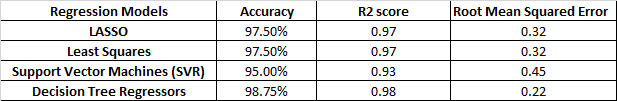